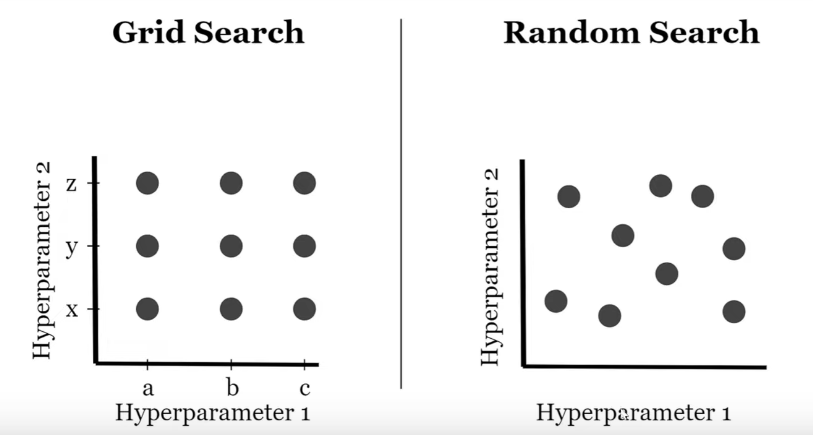

# Dataset

In [ ]:
from sklearn.datasets import make_classification

X , y = make_classification(n_samples=1000 , n_features=20 , n_informative=10 , n_redundant=5 , n_classes=2 , random_state=0)

In [ ]:
X[2]

array([ 1.12684548, -1.95707848, -0.88185662, -0.02045365,  2.60443756,
       -3.11888607, -0.16913668, -0.87146067,  1.90325145, -0.07855746,
       -1.86193132, -1.2206071 , -1.05545888, -1.26004578,  0.8059161 ,
        1.06384795, -0.76054028, -0.42313918, -1.43958839,  0.92768406])

In [ ]:
X.shape , y.shape

((1000, 20), (1000,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train, y_test = train_test_split(X , y , test_size=0.2)

In [ ]:
X_train[2]

array([ 2.14661066, -5.28572155, -3.28862895, -0.96813728,  4.76866992,
       -6.28962999,  3.73784297,  0.35525557, -1.84295371,  0.4516861 ,
       -6.8221502 , -7.37628647,  0.45036217,  4.09102899,  1.54523101,
       -1.691734  , -0.57846386, -0.89652979,  3.56145567, -3.67770628])

In [ ]:
y_train[4]

0

# Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[2]

array([0.59960942, 0.19652211, 0.27027056, 0.30724862, 0.63597027,
       0.07708048, 0.75390625, 0.53307231, 0.36660886, 0.5023957 ,
       0.25500872, 0.17671109, 0.48654972, 0.87157028, 0.68345846,
       0.30099908, 0.37781514, 0.42520412, 0.7903934 , 0.37919749])

# Model Definition

In [ ]:
import tensorflow as tf
from tensorflow import keras

def create_model(hidden_units=16 , optimizer="adam"):

  model= keras.Sequential()
  model.add(tf.keras.Input(shape=(20,)))
  model.add(keras.layers.Dense(units=hidden_units , activation="relu" ))
  model.add(keras.layers.Dense(units=1 , activation="sigmoid"))

  model.compile (optimizer=optimizer , loss=tf.losses.binary_crossentropy , metrics=["accuracy"])

  return model


# Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV



In [ ]:
!pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier

model = KerasClassifier(model=create_model , loss="binary_crossentropy" , epochs=10 , batch_size=32 , verbose=0)

params= {
    "model__hidden_units" : [16 , 32 , 64],
    "model__optimizer" : ["adam" , "rmsprop"]
}


In [ ]:
grid = GridSearchCV(estimator=model, param_grid=params , cv=3)
grid_result = grid.fit(X_train, y_train)

In [ ]:
best_params = grid_result.best_params_
best_params

{'model__hidden_units': 64, 'model__optimizer': 'adam'}

In [ ]:
best_score = grid_result.best_score_
best_score * 100

68.50600283480236

# Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(estimator=model , param_distributions=params , cv=3 , n_iter=4)
rs_result = rs.fit(X_train , y_train)

In [ ]:
best_params = rs_result.best_params_
best_params

{'model__optimizer': 'rmsprop', 'model__hidden_units': 64}

In [ ]:
best_score = rs_result.best_score_
best_score * 100

66.50052096533469

# With Test Data

In [ ]:
model = create_model(hidden_units=64, optimizer="adam") # grid-search : 72
#model = create_model(hidden_units=64, optimizer="rmsprop") # random-search : 69,5

model.fit (X_train , y_train , epochs=10 , batch_size=32 , validation_data=(X_test , y_test) , verbose=0)

#prediction
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype("int32")

from sklearn.metrics import accuracy_score

acc = accuracy_score (y_true= y_test , y_pred = y_pred)
acc * 100

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


70.5